[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jchai\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Word 1 ("chang") appears 1 time.
Word 2 ("climat") appears 1 time.
Word 9 ("https") appears 1 time.
Word 418 ("head") appears 1 time.
Word 644 ("dude") appears 1 time.
Word 979 ("denier") appears 1 time.
Word 2285 ("aw") appears 1 time.
Word 2605 ("followernodad") appears 1 time.
Word 2961 ("shade") appears 1 time.
Word 2962 ("stain") appears 1 time.
Topic: 0 
Words: 0.188*"global" + 0.181*"warm" + 0.075*"https" + 0.011*"real" + 0.011*"weather" + 0.010*"say" + 0.009*"think" + 0.008*"cold" + 0.007*"trump" + 0.007*"hoax"
Topic: 1 
Words: 0.110*"climat" + 0.107*"chang" + 0.090*"https" + 0.009*"trump" + 0.008*"lead" + 0.007*"impact" + 0.007*"fight" + 0.007*"http" + 0.007*"scientist" + 0.007*"carbon"
Topic: 2 
Words: 0.128*"https" + 0.127*"climat" + 0.123*"chang" + 0.020*"trump" + 0.015*"think" + 0.013*"believ" + 0.010*"go" + 0.005*"scienc" + 0.005*"thehil" + 0.004*"scientist"
Topic: 3 
Words: 0.118*"climat" + 0.115*"chang" + 0.071*"https" + 0.038*"http" + 0.012*"world" + 0.009*"right" + 0.

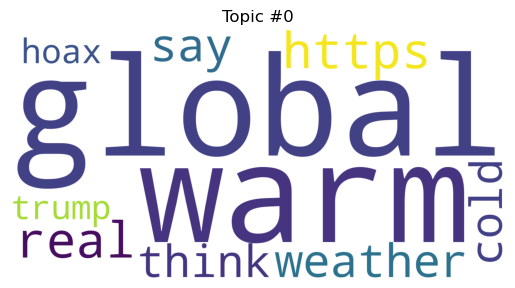

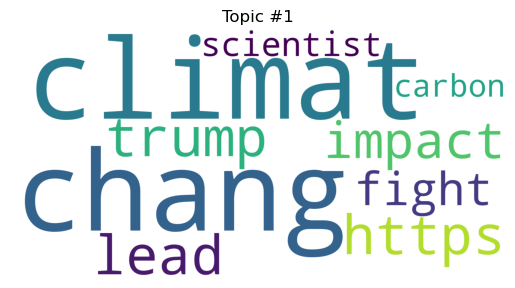

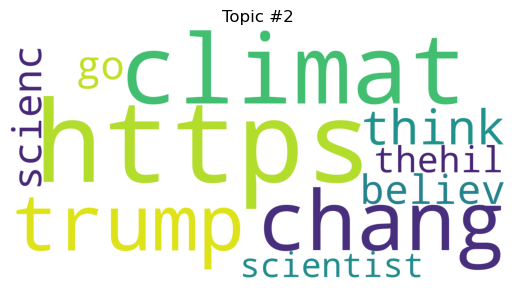

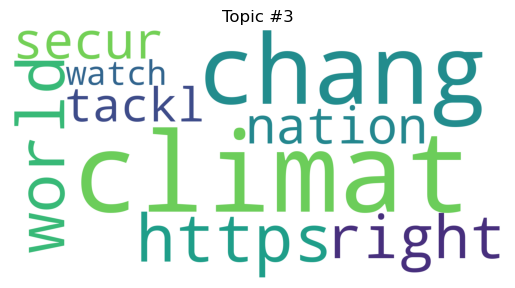

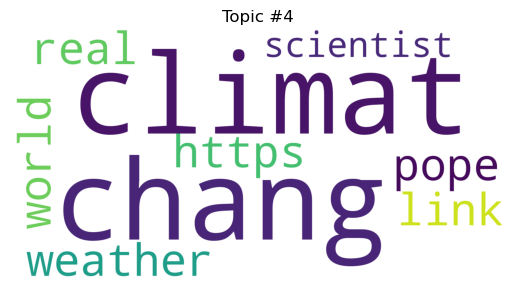

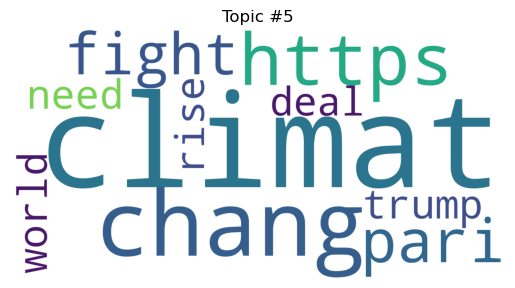

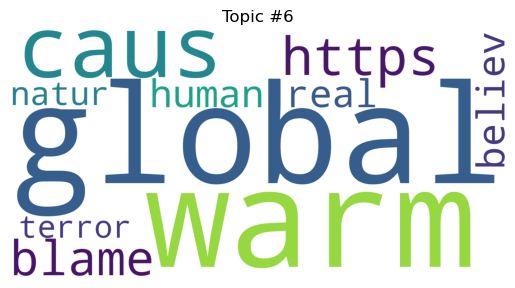

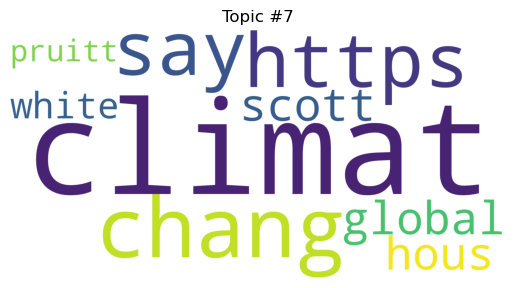

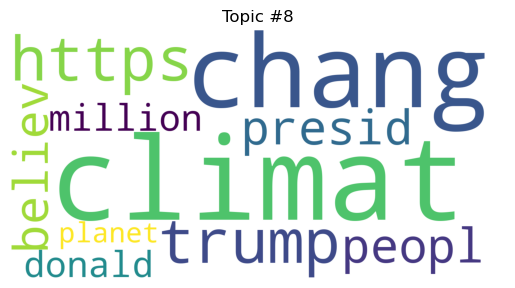

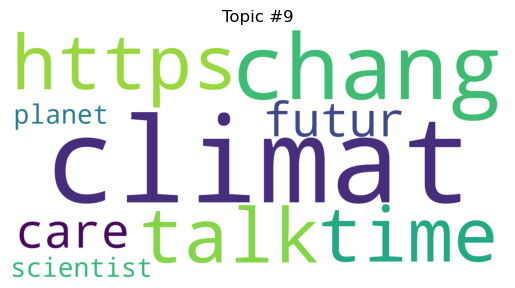

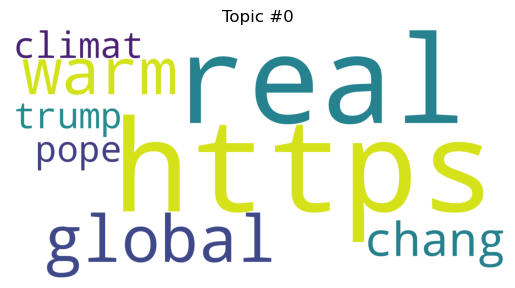

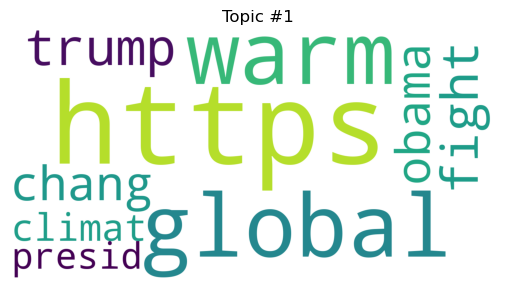

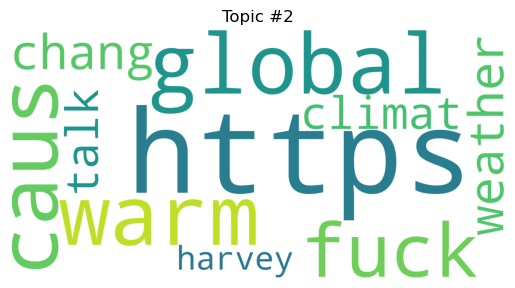

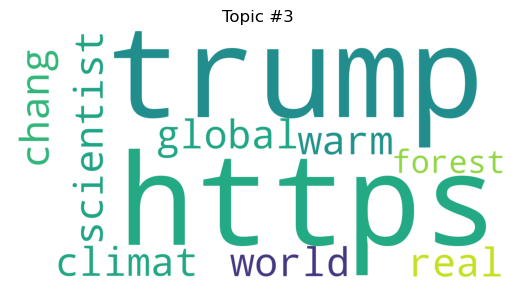

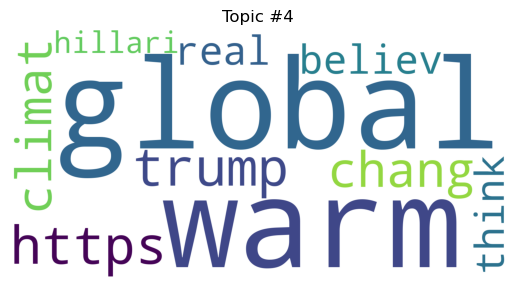

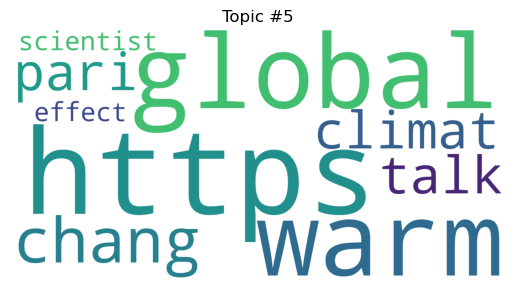

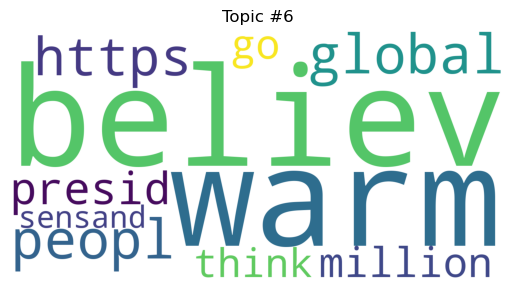

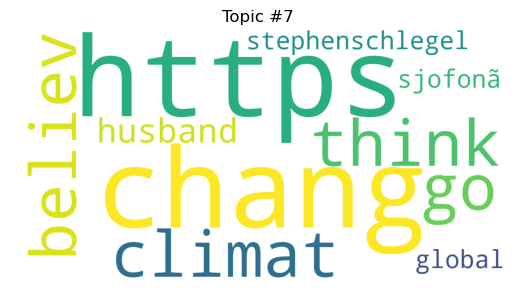

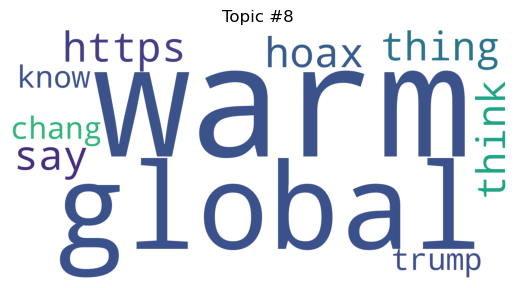

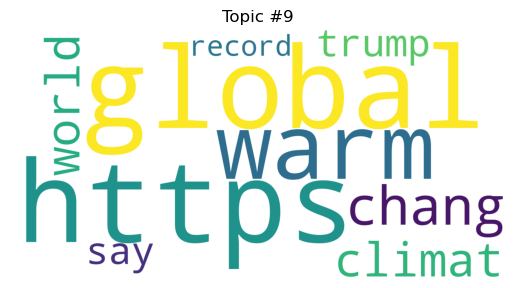

In [16]:
# Importing all the necessary packages
import pandas as pd
import numpy as np
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora, models
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from gensim import corpora, models


# Loading data from the CSV file
df = pd.read_csv('C://Users//jchai//Downloads//climate_change.csv')

# Data-Preprocessing using gensim and SnowballStemmer
stemmer = SnowballStemmer('english')
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
    
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

# Preprocessing the text column
processed_docs = df['message'].map(preprocess)

# Creating a dictionary from the processed text
dictionary = gensim.corpora.Dictionary(processed_docs)

# Filtering out the tokens that appear in less than 5 documents, or more than 80% of the documents
dictionary.filter_extremes(no_below=5, no_above=0.8)

# Creating a bag-of-words representation of the documents
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Previewing the bag-of-words for the sample processed data
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))
        
# Training the LDA model
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)


# Printing the topics and their top words
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

# Visualizing the topics
topics = lda_model.show_topics(formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in topics]

# Plotting the topics as word-clouds
for topic in topics_words:
    plt.figure()
    wordcloud = WordCloud(background_color='white', width=1600, height=800).generate(' '.join(topic[1]))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title('Topic #{}'.format(topic[0]))
    
# Creating tf-idf model object using models.TfidfModel on ‘bow_corpus’ and save it to ‘tfidf’, 
# then applying transformation to the entire corpus and call it ‘corpus_tfidf’. 
# Previewing TF-IDF scores for our first document.
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break
    
# Running LDA using TF-IDF
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))
    

# Visualizing the topics(LDA using TF-IDF)
topics = lda_model_tfidf.show_topics(formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in topics]

# Plotting the topics(LDA using TF-IDF) as word clouds
for topic in topics_words:
    plt.figure()
    wordcloud = WordCloud(background_color='white', width=1600, height=800).generate(' '.join(topic[1]))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title('Topic #{}'.format(topic[0]))
    
# Performance evaluation by classifying sample document using LDA Bag of Words model
processed_docs[4310]
for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))

# Performance evaluation by classifying sample document using LDA TF-IDF Bag of Words model
for index, score in sorted(lda_model_tfidf[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))

In [5]:
!pip install wordcloud


     ------------------------------------ 153.3/153.3 kB 537.8 kB/s eta 0:00:00


In [8]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.6673202742344644),
 (1, 0.02296413931957109),
 (2, 0.021790736592894364),
 (3, 0.12052618116776538),
 (4, 0.473725570749899),
 (5, 0.36591718842411675),
 (6, 0.3427198398680539),
 (7, 0.2517671732913005)]


In [9]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [10]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.118*"https" + 0.109*"climat" + 0.106*"chang" + 0.013*"fight" + 0.008*"trump" + 0.007*"impact" + 0.007*"citi" + 0.006*"help" + 0.005*"http" + 0.005*"studi"
Topic: 1 
Words: 0.115*"climat" + 0.114*"chang" + 0.081*"https" + 0.011*"talk" + 0.009*"trump" + 0.008*"like" + 0.008*"debat" + 0.008*"look" + 0.008*"issu" + 0.005*"peopl"
Topic: 2 
Words: 0.075*"climat" + 0.072*"chang" + 0.057*"https" + 0.019*"realdonaldtrump" + 0.018*"global" + 0.016*"warm" + 0.011*"scientist" + 0.009*"hoax" + 0.009*"chines" + 0.009*"call"
Topic: 3 
Words: 0.118*"climat" + 0.115*"chang" + 0.087*"https" + 0.010*"world" + 0.008*"energi" + 0.007*"fight" + 0.007*"trump" + 0.006*"obama" + 0.005*"extrem" + 0.005*"govern"
Topic: 4 
Words: 0.100*"https" + 0.095*"climat" + 0.093*"chang" + 0.029*"http" + 0.012*"say" + 0.010*"year" + 0.010*"pari" + 0.009*"trump" + 0.008*"effect" + 0.007*"agreement"
Topic: 5 
Words: 0.216*"global" + 0.207*"warm" + 0.045*"https" + 0.015*"real" + 0.012*"like" + 0.011*"caus" + 

In [11]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.012*"https" + 0.009*"global" + 0.008*"warm" + 0.007*"http" + 0.006*"chang" + 0.006*"climat" + 0.005*"trump" + 0.005*"fight" + 0.005*"stop" + 0.005*"obama"
Topic: 1 Word: 0.012*"peopl" + 0.011*"warm" + 0.011*"global" + 0.011*"https" + 0.009*"believ" + 0.008*"million" + 0.008*"presid" + 0.007*"elect" + 0.006*"go" + 0.006*"sensand"
Topic: 2 Word: 0.018*"real" + 0.015*"warm" + 0.015*"global" + 0.011*"https" + 0.007*"think" + 0.006*"trump" + 0.006*"chang" + 0.006*"climat" + 0.005*"http" + 0.005*"world"
Topic: 3 Word: 0.012*"https" + 0.010*"global" + 0.010*"warm" + 0.007*"pope" + 0.006*"say" + 0.006*"trump" + 0.006*"chang" + 0.006*"secur" + 0.006*"climat" + 0.005*"franci"
Topic: 4 Word: 0.012*"https" + 0.011*"http" + 0.010*"global" + 0.009*"warm" + 0.006*"chang" + 0.006*"climat" + 0.005*"trump" + 0.005*"fight" + 0.004*"scienc" + 0.004*"caus"
Topic: 5 Word: 0.011*"https" + 0.011*"global" + 0.011*"warm" + 0.007*"http" + 0.006*"chang" + 0.006*"climat" + 0.006*"trump" + 0.005*"y

In [12]:
processed_docs[4310]

['followernodad',
 'climat',
 'chang',
 'denier',
 'head',
 'aw',
 'shade',
 'stain',
 'dude',
 'https']

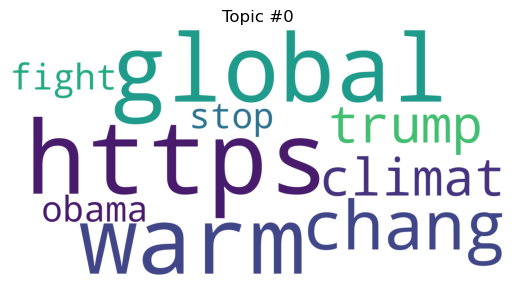

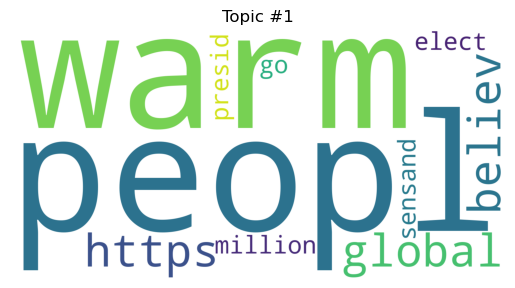

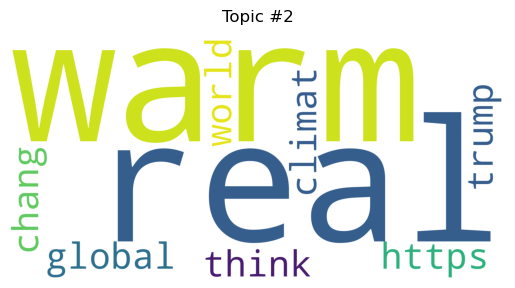

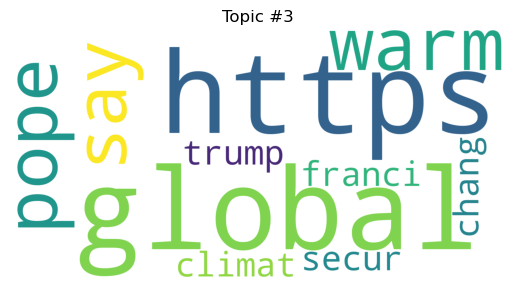

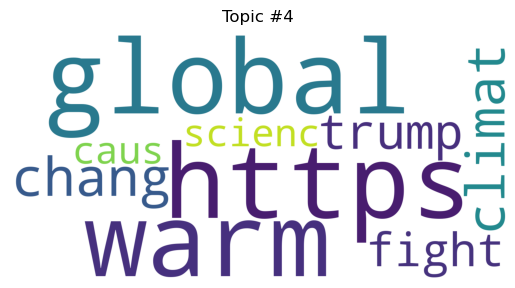

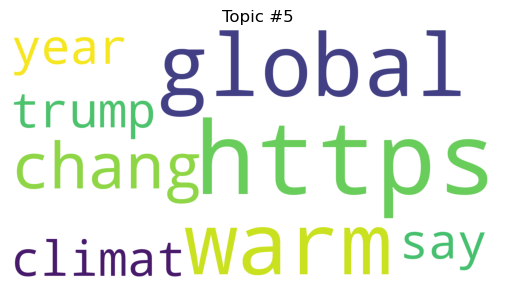

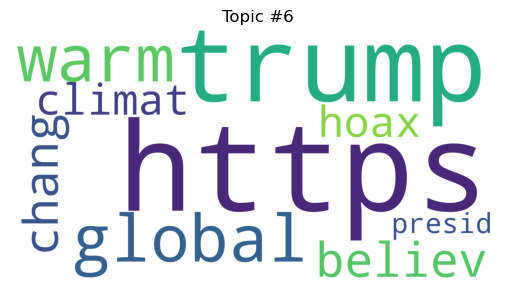

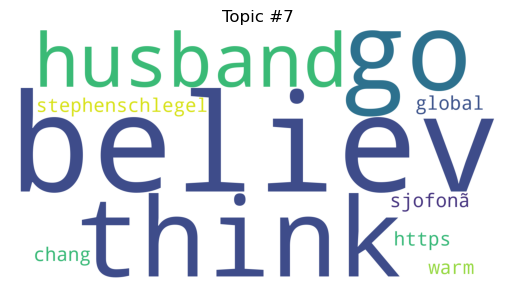

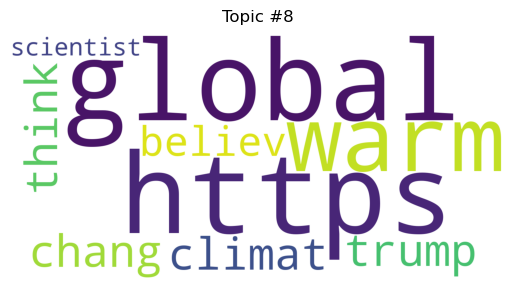

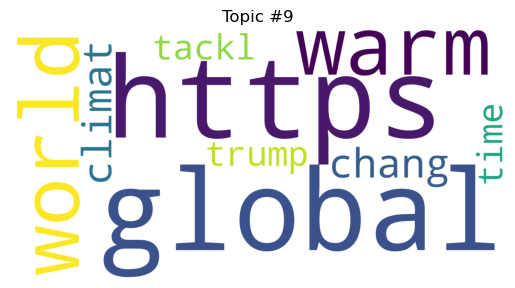

In [14]:
# Visualize the topics
topics = lda_model_tfidf.show_topics(formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in topics]

# Plot the topics as word clouds
for topic in topics_words:
    plt.figure()
    wordcloud = WordCloud(background_color='white', width=1600, height=800).generate(' '.join(topic[1]))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title('Topic #{}'.format(topic[0]))

In [13]:
for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.9181370139122009	 
Topic: 0.105*"climat" + 0.104*"chang" + 0.062*"https" + 0.053*"believ" + 0.032*"go" + 0.030*"peopl" + 0.024*"think" + 0.018*"million" + 0.012*"presid" + 0.012*"real"
